## Importing Libs

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
#import soccerdata as sd
import re
from unidecode import unidecode
from scipy.spatial import ConvexHull
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text, fig_text


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os
%load_ext autoreload
%autoreload 2

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "black"
text_color = 'black'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [2]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


In [3]:
from sqlalchemy import create_engine
import psycopg2

# Database connection settings (replace with your credentials)
db_config = {
    'dbname': 'understat_shots_db',
    'user': 'ichadha',
    'password': 'ichadhapg',
    'host': 'localhost',
    'port': 5432,
}

# Create a connection engine
engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

## Goal of the Week with Lowest xG

### Creating DataFrame

In [94]:
goal_low_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" = 'Goal'
order by "xG" 
limit 1;"""

with engine.connect() as conn:
    df_goal_low_xg = pd.read_sql(goal_low_xg, conn)

In [95]:
df_goal_low_xg['xGOT'] = 0.31

In [28]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/Matches/1821570/Live/Spain-LaLiga-2024-2025-Rayo-Vallecano-Real-Madrid"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Spain, League: LaLiga, Season: 2024/2025, Match Id: 1821570


In [43]:
events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,matchId,startDate,startTime,score,ftScore,htScore,etScore,venueName,maxMinute,playerId,playerName,goalMouthZ,goalMouthY,isShot,endX,endY,relatedEventId,relatedPlayerId,isGoal,blockedX,blockedY,cardType,shotBodyType,situation,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotOpenPlay,shotCounter,shotSetPiece,shotDirectCorner,shotOffTarget,shotOnPost,shotOnTarget,shotsTotal,shotBlocked,shotRightFoot,shotLeftFoot,shotHead,shotObp,goalSixYardBox,goalPenaltyArea,goalObox,goalOpenPlay,goalCounter,goalSetPiece,penaltyScored,goalOwn,goalNormal,goalRightFoot,goalLeftFoot,goalHead,goalObp,shortPassInaccurate,shortPassAccurate,passCorner,passCornerAccurate,passCornerInaccurate,passFreekick,passBack,passForward,passLeft,passRight,keyPassLong,keyPassShort,keyPassCross,keyPassCorner,keyPassThroughball,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,dribbleLost,dribbleWon,challengeLost,interceptionWon,clearanceHead,outfielderBlock,passCrossBlockedDefensive,outfielderBlockedPass,offsideGiven,offsideProvoked,foulGiven,foulCommitted,yellowCard,voidYellowCard,secondYellow,redCard,turnover,dispossessed,saveLowLeft,saveHighLeft,saveLowCentre,saveHighCentre,saveLowRight,saveHighRight,saveHands,saveFeet,saveObp,saveSixYardBox,savePenaltyArea,saveObox,keeperDivingSave,standingSave,closeMissHigh,closeMissHighLeft,closeMissHighRight,closeMissLeft,closeMissRight,shotOffTargetInsideBox,touches,assist,ballRecovery,clearanceEffective,clearanceTotal,clearanceOffTheLine,dribbleLastman,errorLeadsToGoal,errorLeadsToShot,intentionalAssist,interceptionAll,interceptionIntheBox,keeperClaimHighLost,keeperClaimHighWon,keeperClaimLost,keeperClaimWon,keeperOneToOneWon,parriedDanger,parriedSafe,collected,keeperPenaltySaved,keeperSaveInTheBox,keeperSaveTotal,keeperSmother,keeperSweeperLost,keeperMissed,passAccurate,passBackZoneInaccurate,passForwardZoneAccurate,passInaccurate,passAccuracy,cornerAwarded,passKey,passChipped,passCrossAccurate,passCrossInaccurate,passLongBallAccurate,passLongBallInaccurate,passThroughBallAccurate,passThroughBallInaccurate,passThroughBallInacurate,passFreekickAccurate,passFreekickInaccurate,penaltyConceded,penaltyMissed,penaltyWon,passRightFoot,passLeftFoot,passHead,sixYardBlock,tackleLastMan,tackleLost,tackleWon,cleanSheetGK,cleanSheetDL,cleanSheetDC,cleanSheetDR,cleanSheetDML,cleanSheetDMC,cleanSheetDMR,cleanSheetML,cleanSheetMC,cleanSheetMR,cleanSheetAML,cleanSheetAMC,cleanSheetAMR,cleanSheetFWL,cleanSheetFW,cleanSheetFWR,cleanSheetSub,goalConcededByTeamGK,goalConcededByTeamDL,goalConcededByTeamDC,goalConcededByTeamDR,goalConcededByTeamDML,goalConcededByTeamDMC,goalConcededByTeamDMR,goalConcededByTeamML,goalConcededByTeamMC,goalConcededByTeamMR,goalConcededByTeamAML,goalConcededByTeamAMC,goalConcededByTeamAMR,goalConcededByTeamFWL,goalConcededByTeamFW,goalConcededByTeamFWR,goalConcededByTeamSub,goalConcededOutsideBoxGoalkeeper,goalScoredByTeamGK,goalScoredByTeamDL,goalScoredByTeamDC,goalScoredByTeamDR,goalScoredByTeamDML,goalScoredByTeamDMC,goalScoredByTeamDMR,goalScoredByTeamML,goalScoredByTeamMC,goalScoredByTeamMR,goalScoredByTeamAML,goalScoredByTeamAMC,goalScoredByTeamAMR,goalScoredByTeamFWL,goalScoredByTeamFW,goalScoredByTeamFWR,goalScoredByTeamSub,aerialSuccess,duelAerialWon,duelAerialLost,offensiveDuel,defensiveDuel,bigChanceMissed,bigChanceScored,bigChanceCreated,overrun,successfulFinalThirdPasses,punches,penaltyShootoutScored,penaltyShootoutMissedOffTarget,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos
647,2.759203e+09,416,38,33.0,52,a,74.2,34.8,38,FirstHalf,Goal,Successful,"[{'type': 'LowLeft'}, {'type': 'GoalMouthY', '...","[touches, goalNormal, shotOnTarget, shotsTotal...",True,1821570,2024-12-14T00:00:00,2024-12-14T20:00:00,3 : 3,3 : 3,2 : 2,,Estadio

In [96]:
df_goal_low_xg['goalMouthZ'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['goalMouthZ'].iloc[0]
df_goal_low_xg['goalMouthY'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['goalMouthY'].iloc[0]
df_goal_low_xg['second'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['second'].iloc[0]
df_goal_low_xg['score'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['score'].iloc[0]
df_goal_low_xg['venueName'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Federico Valverde')]['venueName'].iloc[0]

### Plotting

In [97]:
df_goal_low_xg

,xg,result,player,situation,h_team,a_team,league,h_a,minute,date,player_assisted,lastAction,X,Y,xGOT,goalMouthZ,goalMouthY,second,score,venueName
0,0.0136,Goal,Federico Valverde,OpenPlay,Rayo Vallecano,Real Madrid,La_Liga,a,38,2024-12-14 20:00:00,Arda Güler,Pass,0.742,0.348,0.31,8.2,53.8,33.0,3 : 3,Estadio de Vallecas


In [62]:
df_goal_low_xg.columns

Index(['xg', 'result', 'player', 'situation', 'h_team', 'a_team', 'league',
       'h_a', 'minute', 'date', 'player_assisted', 'lastAction', 'X', 'Y',
       'xGOT', 'goalMouthZ', 'goalMouthY', 'second', 'score', 'venueName'],
      dtype='object')

In [352]:
def plot_goal_low_xg(df):
    teamcolor = 'white'
    #background = 'green'
    #df['X'] = (df['X'] / 100) * 105 * 100
    #df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.27, 
        y=.8, 
        s='Shot Of The Week', 
        fontsize=25, 
        fontproperties=font_prop,  
        color=teamcolor, 
        ha='center'
    )

    ax1.text(
        x=0.37, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.25, 
        y=.4, 
        s=f"Player - {df['player'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=50000 * df['xg'].iloc[0], 
        c=background,
        marker='football',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolors='white'
    )
    pitch.annotate(f"xG - {df['xg'].iloc[0]}",
        xy=(df['X'].iloc[0],df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"xGOT - {df['xGOT'].iloc[0]}",
        xy=(df['X'].iloc[0]-5,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-10,df['Y'].iloc[0]+12),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.arrows(
        df['X'].iloc[0], df['Y'].iloc[0],105,34,
        width=1.5,alpha=0.8,zorder=3,
        headwidth=8, headlength=5, color='white',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.7, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )


    ax3.set_axis_off()


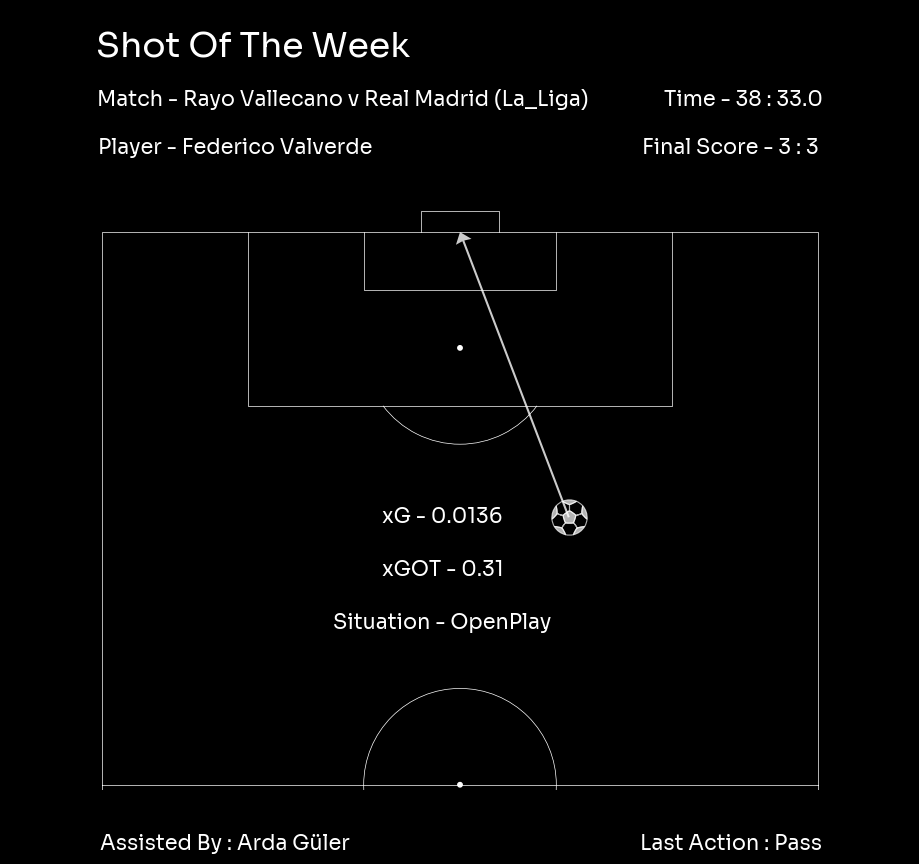

In [353]:
plot_goal_low_xg(df_goal_low_xg)